In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# ==== CONFIG ====
base_path = "./"  # root directory containing landmarks_00, landmarks_01, etc.
folders = sorted([f for f in os.listdir(base_path) if f.startswith("landmarks_")])

# ==== DEFINE LANDMARK INDICES (adjust as needed) ====
# Example indices for mouth corners and lips
upper_lip_idx = 13   # FLAME/mediapipe upper lip landmark index
lower_lip_idx = 14   # FLAME/mediapipe lower lip landmark index
left_lip_idx  = 61   # left mouth corner
right_lip_idx = 291  # right mouth corner

def compute_motion_metrics(landmarks):
    """Compute jaw opening, lip corner distance, and velocity from landmarks array (frames, points, 2)."""
    jaw = np.linalg.norm(landmarks[:, upper_lip_idx] - landmarks[:, lower_lip_idx], axis=1)
    lip_width = np.linalg.norm(landmarks[:, left_lip_idx] - landmarks[:, right_lip_idx], axis=1)
    velocity = np.abs(np.diff(jaw, prepend=jaw[0]))
    return jaw, lip_width, velocity

# ==== PROCESS EACH LANDMARK FOLDER ====
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    landmark_files_2d = sorted(glob.glob(os.path.join(folder_path, "*_2d.npy")))
    landmark_files_3d = sorted(glob.glob(os.path.join(folder_path, "*_3d.npy")))

    # Load all frames
    landmarks_2d_all = [np.load(f) for f in landmark_files_2d]
    landmarks_2d_all = np.stack(landmarks_2d_all)  # shape: (frames, points, 2)

    # If 3D exists, load it as well
    landmarks_3d_all = None
    if landmark_files_3d:
        landmarks_3d_all = [np.load(f) for f in landmark_files_3d]
        landmarks_3d_all = np.stack(landmarks_3d_all)  # shape: (frames, points, 3)

    # Compute metrics
    jaw_motion, lip_motion, jaw_velocity = compute_motion_metrics(landmarks_2d_all)

    # Save metrics
    np.save(os.path.join(folder_path, "jaw_motion.npy"), jaw_motion)
    np.save(os.path.join(folder_path, "lip_motion.npy"), lip_motion)
    np.save(os.path.join(folder_path, "jaw_velocity.npy"), jaw_velocity)

    # Plot and save visualization
    plt.figure(figsize=(10, 4))
    plt.plot(jaw_motion, label="Jaw Opening")
    plt.plot(lip_motion, label="Lip Width")
    plt.title(f"Facial Motion (2D) - {folder}")
    plt.xlabel("Frame")
    plt.ylabel("Distance")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, "motion_plot.png"))
    plt.close()

    print(f"[INFO] Processed {folder}: saved metrics and plot.")



IndexError: index 291 is out of bounds for axis 1 with size 105

In [2]:
import numpy as np
lm = np.load("/home/dwaynerei/smirk/results/landmarks_00/frame_0000_2d.npy")
print("Landmarks_2d shape:", lm.shape)  # e.g. (105, 2)

Landmarks_2d shape: (105, 3)


In [3]:
import numpy as np
lm = np.load("/home/dwaynerei/smirk/results/landmarks_00/frame_0000_3d.npy")
print("Landmarks_3d shape:", lm.shape)  # e.g. (105, 2)

Landmarks_3d shape: (5023, 3)


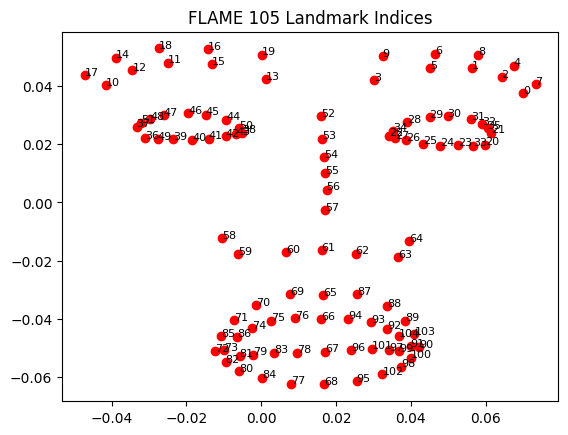

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load one landmark frame
landmarks = np.load("/home/dwaynerei/smirk/results/landmarks_00/frame_0000_2d.npy")[:, :2]  # use only x,y

# Plot
plt.scatter(landmarks[:,0], landmarks[:,1], c='red')  # flip y for proper orientation
for i, (x, y) in enumerate(landmarks):
    plt.text(x, y, str(i), fontsize=8)
plt.title("FLAME 105 Landmark Indices")
plt.show()


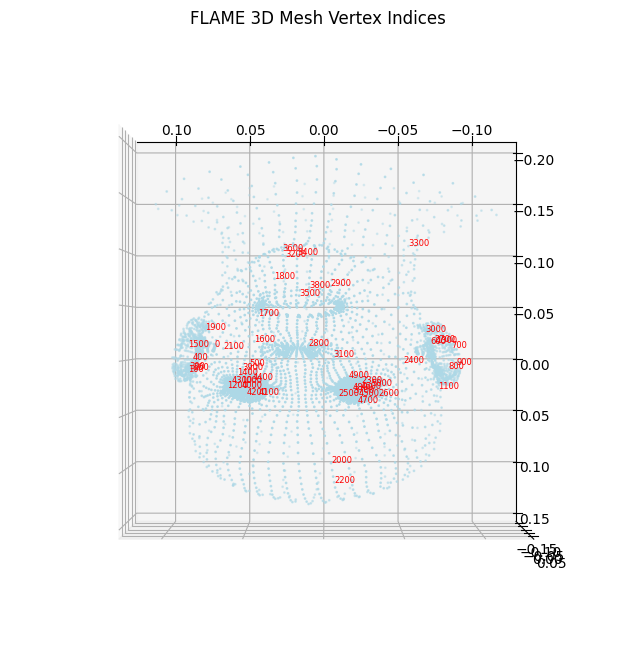

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vertices = np.load("/home/dwaynerei/smirk/results/landmarks_00/frame_0000_3d.npy")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c='lightblue', s=1)

# Label a subset of points for inspection (every 100th to avoid clutter)
for i in range(0, vertices.shape[0], 100):
    ax.text(vertices[i,0], vertices[i,1], vertices[i,2], str(i), color='red', fontsize=6)

ax.view_init(elev=90, azim=90)
ax.set_title("FLAME 3D Mesh Vertex Indices")
plt.show()
